In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
flares = pd.read_csv('/content/drive/MyDrive/Mflares.csv')
spots = pd.read_csv('/content/drive/MyDrive/Mspots.csv')

flares.head()

<ipython-input-4-4bbe4c6345f7>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  spots = pd.read_csv('/content/drive/MyDrive/Mspots.csv')


,Date,Time,X-ray Class,Flare Magnitude,NOAA,Start Time,End Time,Flare Duration,Year
0,1981-01-03,15:49,C,22.0,2857.0,1981-01-03 15:39:00,1981-01-03 15:59:00,20.0,1981
1,1981-01-03,21:59,C,12.0,2857.0,1981-01-03 21:49:00,1981-01-03 22:09:00,20.0,1981
2,1981-01-03,22:27,C,20.0,2866.0,1981-01-03 22:17:00,1981-01-03 22:37:00,20.0,1981
3,1981-01-04,16:51,C,22.0,2872.0,1981-01-04 16:41:00,1981-01-04 17:01:00,20.0,1981
4,1981-01-05,13:58,C,18.0,2875.0,1981-01-05 13:48:00,1981-01-05 14:08:00,20.0,1981


In [ ]:
spots.head()

,Date,Time,Number of Spots,McIntosh Class,NOAA,Zurich Class,Penumbra Class,Compactness Class,DateTime,Year
0,1981-12-01,00:21,32,EKI,3478,E,K,I,1981-12-01 00:21:00,1981
1,1981-12-01,00:21,8,CRO,3481,C,R,O,1981-12-01 00:21:00,1981
2,1981-12-01,00:21,5,BXO,3488,B,X,O,1981-12-01 00:21:00,1981
3,1981-12-01,00:21,6,BXO,3486,B,X,O,1981-12-01 00:21:00,1981
4,1981-12-01,00:21,9,DSO,3485,D,S,O,1981-12-01 00:21:00,1981


In [ ]:
flares.dropna(inplace=True)
flares.head()

,Date,Time,X-ray Class,Flare Magnitude,NOAA,Start Time,End Time,Flare Duration,Year
0,1981-01-03,15:49,C,22.0,2857.0,1981-01-03 15:39:00,1981-01-03 15:59:00,20.0,1981
1,1981-01-03,21:59,C,12.0,2857.0,1981-01-03 21:49:00,1981-01-03 22:09:00,20.0,1981
2,1981-01-03,22:27,C,20.0,2866.0,1981-01-03 22:17:00,1981-01-03 22:37:00,20.0,1981
3,1981-01-04,16:51,C,22.0,2872.0,1981-01-04 16:41:00,1981-01-04 17:01:00,20.0,1981
4,1981-01-05,13:58,C,18.0,2875.0,1981-01-05 13:48:00,1981-01-05 14:08:00,20.0,1981


In [ ]:
flares.to_csv('/content/drive/MyDrive/Mflares.csv', index=False)

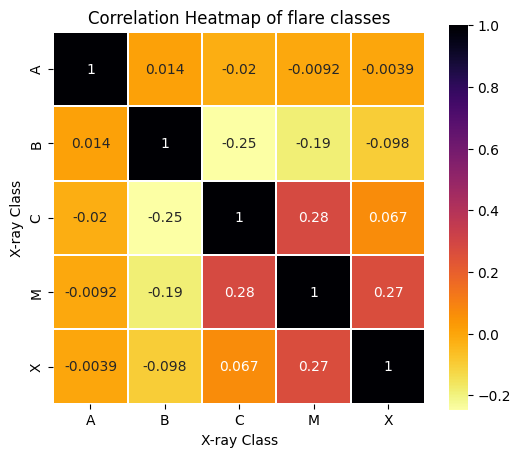

In [ ]:
significant_flares = flares[(flares['X-ray Class'] == 'X') | (flares['X-ray Class'] == 'M')]
significant_flares.head()

less_significant_flares = flares[(flares['X-ray Class'] == 'A') | (flares['X-ray Class'] == 'B') | (flares['X-ray Class'] == 'C')]
less_significant_flares.head()

cmx_flares = flares[(flares['X-ray Class'] == 'C') | (flares['X-ray Class'] == 'M') | (flares['X-ray Class'] == 'X')]
cmx_flares_to_visualize = cmx_flares.sort_values(by=['Date'], ascending=True)
ftv = cmx_flares_to_visualize.groupby(['Date', 'X-ray Class']).size().reset_index(name="Occurrence")
ftv.head()

# Relationship between flare classes
relationship_df = pd.pivot_table(flares, index='Date', columns='X-ray Class', aggfunc='size', fill_value=0)
relationship_df.head()

# Correlation matrix to plot heatmap
corr = relationship_df.corr()
corr

#heat map plot
plt.gcf().set_size_inches((6,5))
colormap = plt.cm.inferno_r
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            square=True, linewidths=0.15, cmap=colormap, linecolor='white', annot=True)
plt.title('Correlation Heatmap of flare classes')
plt.show()

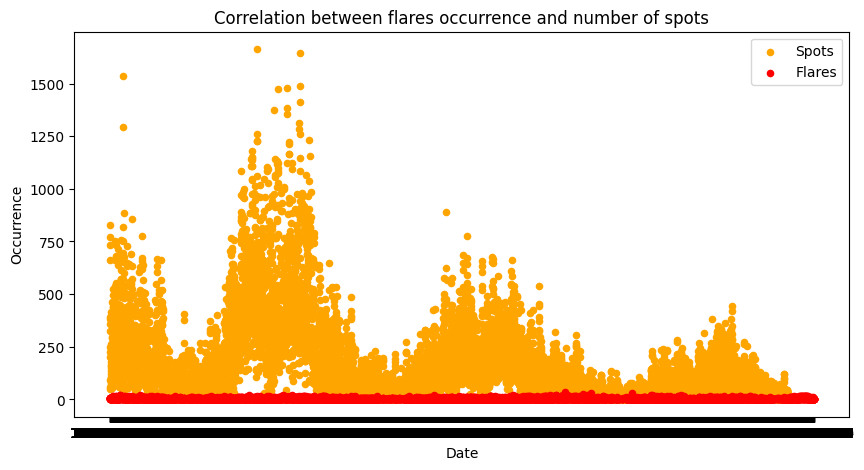

In [ ]:
flares_yearly_occurrence = pd.pivot_table(flares, index='Year', columns='X-ray Class', aggfunc='size', fill_value=0)
flares_yearly_occurrence['Year'] = flares_yearly_occurrence.index
flares_yearly_occurrence.head()

# flare occurrence
flares_occurrence = flares.groupby(['Date']).size().reset_index(name="Occurrence")
flares_occurrence.head()

# spots occurrence
spots_occurrence = spots.groupby(['Date']).sum('Number of Spots').reset_index()
spots_occurrence.drop(axis=1, labels=['Year'], inplace=True)
spots_occurrence.head()

## Using scatter plot to visualize flares occurrence against number of spots
fig, ax = plt.subplots()
plt.gcf().set_size_inches((10,5))
spots_occurrence.plot.scatter(x='Date', y='Number of Spots', c='orange', label='Spots', ax=ax)
flares_occurrence.plot.scatter(x='Date', y='Occurrence', c='red', label='Flares', ax=ax)
plt.title('Correlation between flares occurrence and number of spots')
plt.show()



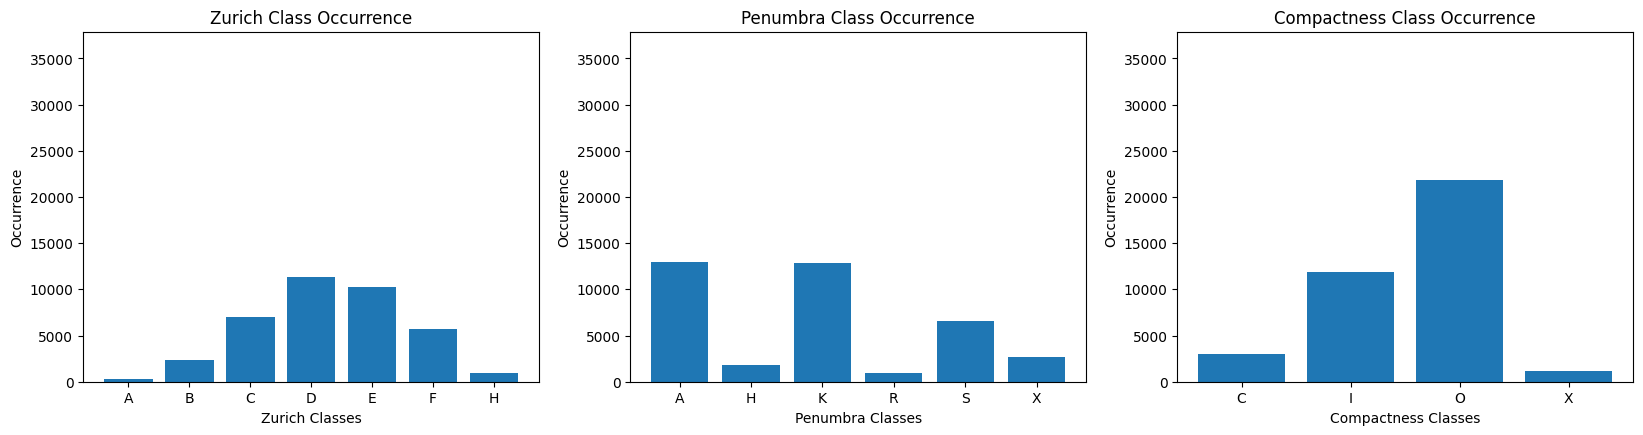

In [ ]:
# Sunspots with significant flares
sunspot_with_significant_flares = spots.loc[spots['NOAA'].isin(significant_flares['NOAA'])]
sunspot_with_significant_flares.head()

# Zurich class occurrence
zurich_class_occurrence = sunspot_with_significant_flares.groupby(['Zurich Class']).size().reset_index(name="Occurrence")
zurich_class_occurrence.head()

# Penumbra class occurrence
penumbra_class_occurrence = sunspot_with_significant_flares.groupby(['Penumbra Class']).size().reset_index(name="Occurrence")
penumbra_class_occurrence.head()

# Compactness class occurrence
compactness_class_occurrence = sunspot_with_significant_flares.groupby(['Compactness Class']).size().reset_index(name="Occurrence")
compactness_class_occurrence.head()

# Bar plots of occurrences of zurich class, penumbra class and compactness class

plt.gcf().set_size_inches((20,10))
plt.subplot(2, 3, 1)
plt.bar(zurich_class_occurrence['Zurich Class'], zurich_class_occurrence['Occurrence'])
plt.xlabel('Zurich Classes')
plt.ylabel('Occurrence')
plt.title('Zurich Class Occurrence')
plt.ylim(0,len(sunspot_with_significant_flares))

plt.subplot(2, 3, 2)
plt.bar(penumbra_class_occurrence['Penumbra Class'], penumbra_class_occurrence['Occurrence'])
plt.xlabel('Penumbra Classes')
plt.ylabel('Occurrence')
plt.title('Penumbra Class Occurrence')
plt.ylim(0,len(sunspot_with_significant_flares))

plt.subplot(2, 3, 3)
plt.bar(compactness_class_occurrence['Compactness Class'], compactness_class_occurrence['Occurrence'])
plt.xlabel('Compactness Classes')
plt.ylabel('Occurrence')
plt.title('Compactness Class Occurrence')
plt.ylim(0,len(sunspot_with_significant_flares))

plt.show()